# Timing plots

Notebook to plot the results from the [timing_tests](./Timing_tests.ipynb) file

## Import libraries

In [1]:
# Default libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Import result CSVs

In [4]:
import pandas as pd
results_files = [
    'results_Zephyrus.csv',
]

# Concatenate all dataframes into one
results = pd.concat(
    [pd.read_csv(file, index_col=0) for file in results_files],
    ignore_index=False
)

# Add CPU or GPU groups and type of classifier
results['Classifier'] = results.index.str.split('-').str[0]
results['Type'] = np.where(results.index.str.contains('CPU'), 'CPU', 'GPU')

# Remap processor names for shorter labels
short_processors = {
    "AMD64 Family 25 Model 80 Stepping 0, AuthenticAMD": 'AMD Ryzen 7 5800HS',
    "NVIDIA GeForce RTX 3050 Laptop GPU": "NVIDIA GeForce RTX 3050"
    }
results['processor'] = results['processor'].map(short_processors)

# Remap CCA classifier name
results['Classifier'] = results['Classifier'].replace({"CCA": "fbCCA"})


## Barplots

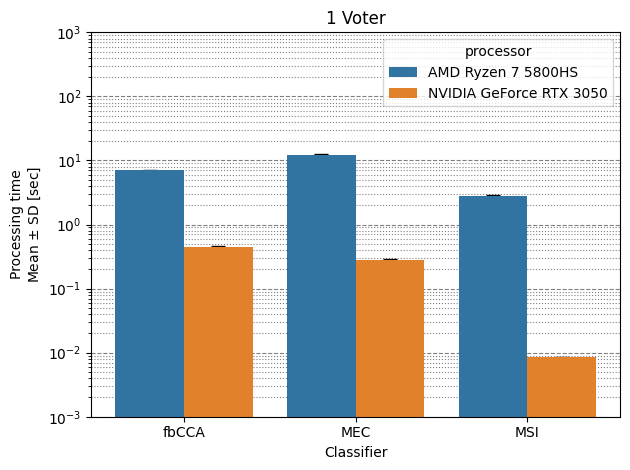

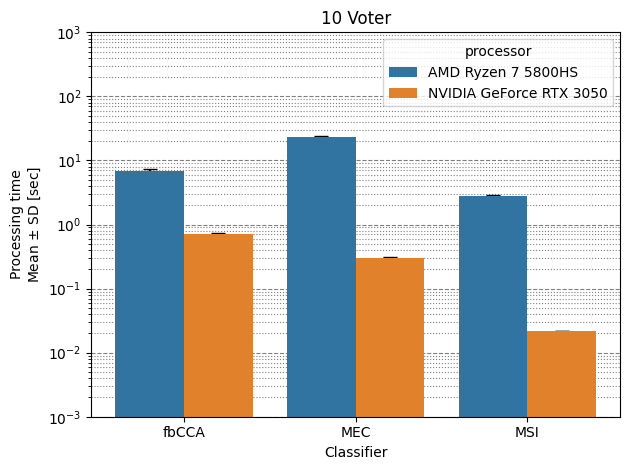

In [5]:
# Settings 
save_fig = False
voters_groups = [1,10]

for voters in voters_groups:
    df = results[results['nvoters'] == voters]

    fig, ax = plt.subplots()    
    # Create a bar plot for 1 voter with alpha set to 1
    sns.barplot(
        data = df,
        x = 'Classifier',
        y = 'Mean',
        hue = 'processor',
        ax = ax,
        capsize = 0.1,
        alpha = 1,
        zorder = 2
        )

    # Get the number of classifiers
    num_classifiers = len(df['Classifier'].unique())

    # Get the number of processor types
    num_processors = len(df['processor'].unique())

    # Calculate the width of each bar
    bar_width = 0.8 / num_processors

    # Add error bars
    for i, classifier in enumerate(df['Classifier'].unique()):
        for j, processor in enumerate(df['processor'].unique()):
            # Get the mean and SD for the current classifier and processor
            mean = df[(df['Classifier'] == classifier) & (df['processor'] == processor)]['Mean']
            sd = df[(df['Classifier'] == classifier) & (df['processor'] == processor)]['SD']
            
            # Calculate the x position for the error bar
            x_pos = i - 0.4 + j * bar_width + bar_width / 2
            
            # Add the error bar
            ax.errorbar(x=x_pos, y=mean, yerr=sd, fmt='none', capsize=5, color='black', zorder=0)

    # Set the gridlines to be black and behind the barplots
    ax.grid(axis='y', linestyle='--', alpha=0.5, color='black', zorder=0)
    ax.yaxis.grid(True, which='minor', linestyle=':', alpha=0.5, color='black', zorder=0)

    # Set the y-axis scale to logarithmic
    ax.set_yscale('log')
    ax.set_ylim(1e-3, 1e3)

    # Set the title and labels
    ax.set_title(f'{voters} Voter')
    ax.set_ylabel('Processing time\nMean $\pm$ SD [sec]')

    plt.tight_layout()
    plt.show()

    # Save the figure
    if save_fig:
        fig.savefig(f'figures\processing_time_{voters}_voters.svg')

### Multivoter plot

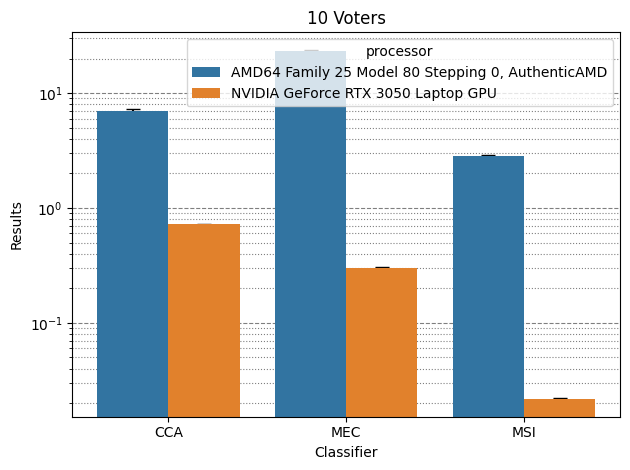

In [ ]:
fig, ax = plt.subplots()

# Create a bar plot for 1 voter with alpha set to 1
sns.barplot(
    data = df_10_voters,
    x = 'Classifier',
    y = 'Mean',
    hue = 'processor',
    ax = ax,
    capsize = 0.1,
    alpha = 1,
    zorder = 2
    )

# Get the number of classifiers
num_classifiers = len(df_10_voters['Classifier'].unique())

# Get the number of processor types
num_processors = len(df_10_voters['processor'].unique())

# Calculate the width of each bar
bar_width = 0.8 / num_processors

# Add error bars
for i, classifier in enumerate(df_10_voters['Classifier'].unique()):
    for j, processor in enumerate(df_10_voters['processor'].unique()):
        # Get the mean and SD for the current classifier and processor
        mean = df_10_voters[(df_10_voters['Classifier'] == classifier) & (df_10_voters['processor'] == processor)]['Mean']
        sd = df_10_voters[(df_10_voters['Classifier'] == classifier) & (df_10_voters['processor'] == processor)]['SD']
        
        # Calculate the x position for the error bar
        x_pos = i - 0.4 + j * bar_width + bar_width / 2
        
        # Add the error bar
        ax.errorbar(x=x_pos, y=mean, yerr=sd, fmt='none', capsize=5, color='black', zorder=0)

# Set the gridlines to be black and behind the barplots
ax.grid(axis='y', linestyle='--', alpha=0.5, color='black', zorder=0)
ax.yaxis.grid(True, which='minor', linestyle=':', alpha=0.5, color='black', zorder=0)

# Set the y-axis scale to logarithmic
ax.set_yscale('log')

# Set the title and labels
ax.set_title('10 Voters')
ax.set_ylabel('Results')

plt.tight_layout()
plt.show()